<a href="https://colab.research.google.com/github/Nikhilaettadi/2003A52025_assignment_2/blob/main/BOSTON_HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
path="/content/drive/MyDrive/boston.csv"


In [10]:
df=pd.read_csv(path)

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV,PW
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,5
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,4
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,4
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,3


In [13]:
df.shape

(506, 15)

In [14]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
MEDV       0
PW         0
dtype: int64

In [15]:
df.rename(columns={'MEDV':'PRICE'},inplace=True)

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,PRICE,PW
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,5
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,4
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,4
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
 14  PW       506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [18]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,PRICE,PW
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,3.254941
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,1.230079
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,1.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,2.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,3.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,4.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,5.000000


In [19]:
corr=df.corr()
corr.shape

(15, 15)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

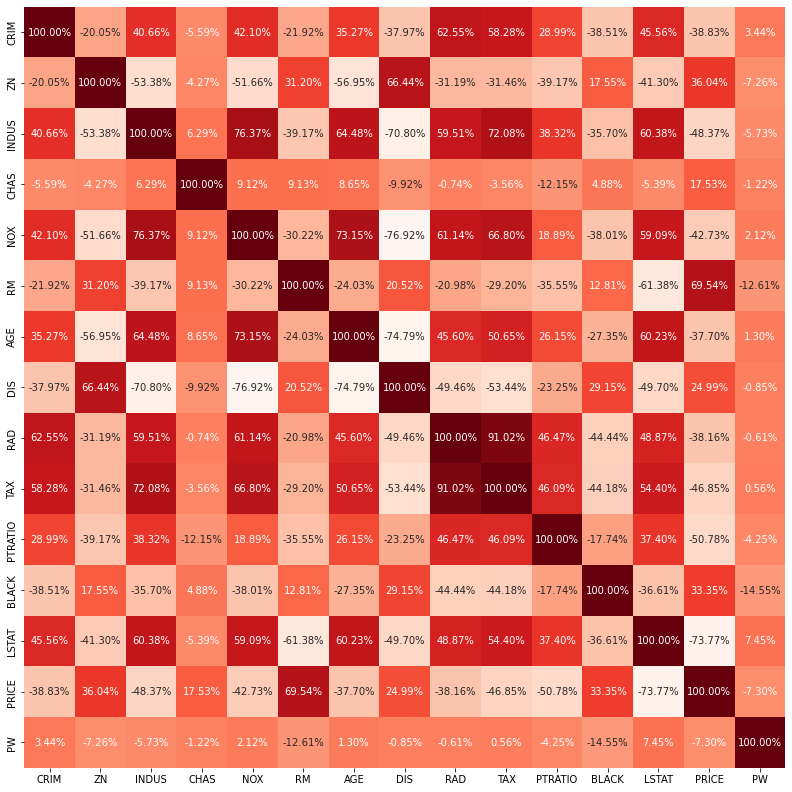

In [21]:
plt.figure(figsize=(14,14))
sns.heatmap(corr,cbar=False,square=True,fmt='.2%',annot=True,cmap='Reds')

<AxesSubplot:>

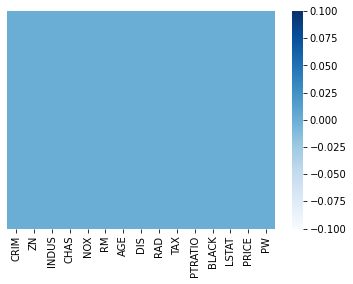

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='Blues')

we can see that there are no null values here


<AxesSubplot:xlabel='RAD', ylabel='count'>

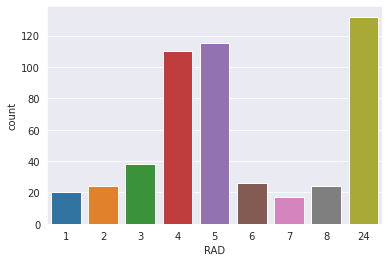

In [23]:
sns.set_style('darkgrid')
sns.countplot(x='RAD',data=df)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

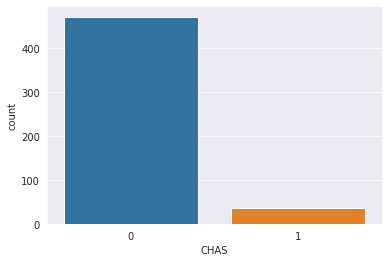

In [24]:
sns.set_style('darkgrid')
sns.countplot(x='CHAS',data=df)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

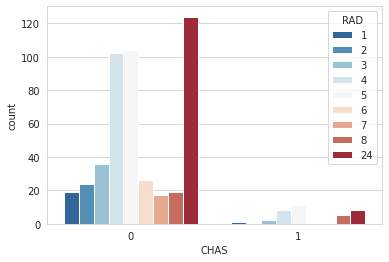

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',hue='RAD',data=df,palette='RdBu_r')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE'>

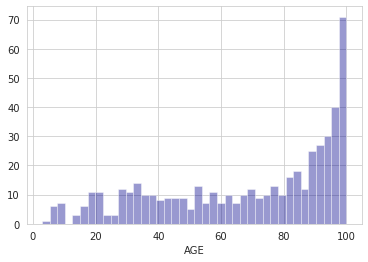

In [27]:
sns.distplot(df['AGE'].dropna(),kde=False,color='darkblue',bins=40)

<AxesSubplot:xlabel='CRIM'>

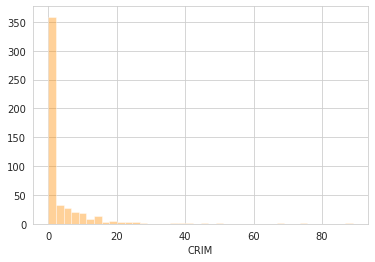

In [28]:
sns.distplot(df['CRIM'].dropna(),kde=False,color='darkorange',bins=40)

<AxesSubplot:xlabel='RM'>

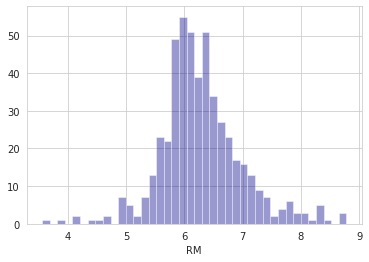

In [29]:
sns.distplot(df['RM'].dropna(),kde=False,color='darkblue',bins=40)

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:13] #independent columns
y = df.iloc[:,-1] #target column i.e price range

In [31]:
y = np.round(df['PRICE'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [32]:
print(featureScores.nlargest(5,'Score')) #print 5 best features

    Specs         Score
9     TAX  14817.836927
1      ZN   5937.859414
0    CRIM   5503.817133
11  BLACK   3340.486412
6     AGE   2424.308937


In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [34]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.11601137 0.02408996 0.04034819 0.0137374  0.07106749 0.13638492
 0.11954074 0.10837593 0.03728063 0.04298594 0.04302954 0.10875595
 0.13839193]


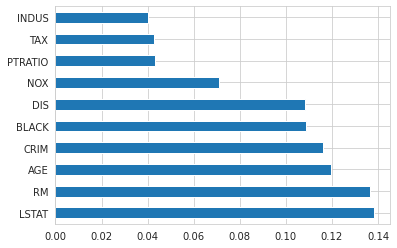

In [35]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [36]:
X=df.iloc[:,0:13]
y=df.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred= model.predict(X_test)  
X_pred= model.predict(X_train)  

In [40]:
y_pred=model.predict(X_train)

In [63]:
print("Training Accuracy:",model.score(X_train,y_train))

Training Accuracy: 0.08518623475129627


In [79]:
print("Testing Accuracy:",model.score(X_test,y_test))

Testing Accuracy: 0.09144953556626034


In [64]:
from sklearn.metrics import mean_squared_error,r2_score

In [81]:
print("Model Accuracy:",r2_score(y,model.predict(X)))

Model Accuracy: 0.08647051592738719


In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [73]:
y_pred = classifier.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
print ("Logistic regression model Accuracy : ", accuracy_score(y_test, y_pred))

Logistic regression model Accuracy :  0.3627450980392157


In [75]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20, criterion='gini',random_state=1,max_depth=3)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=1)

In [76]:
y_pred=classifier.predict(X_test)

In [77]:
print(accuracy_score(y_test,y_pred))

0.2549019607843137
